Part 1 — The Notebook

You need to be able to do pairwise plots, distribution plots, scatterplots, etc.  

For more guidance, review the exploratory_analysis_template.docx attached to this assignment. 

It specifies the various data/plots I want from your dataset.  
Ensure your notebook is organized and has proper Markdown comments, etc.  
You can assume that after someone has read your report, they might want to see the raw notebook, so it should be clear.


# TP1_LMB_BG
## EDA in Python
## Taylor Swift Discography
### 10/10/2024

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Cleaned_Taylor_Swift_Discography.csv")
data['track_name']

0              Fortnight (feat Post Malone)
1             The Tortured Poets Department
2      My Boy Only Breaks His Favorite Toys
3                                  Down Bad
4                                    London
                       ...                 
571                                Our Song
572           I'm Only Me When I'm With You
573                               Invisible
574                  A Perfectly Good Heart
575    Teardrops on My Guitar - Pop Version
Name: track_name, Length: 576, dtype: object

In [4]:
data.head()

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Fortnight (feat Post Malone),Synth Pop,Single,228965,Post Malone,No,0,648525069,1,...,spotify:track:6dODwocEuGzHAavXqTbwHv,502,504.0,386,153.0,961,-10976,308,192004,281
1,1,The Tortured Poets Department,Synth Pop,B-Side,293048,No,No,0,206954130,6,...,spotify:track:4PdLaGZubp4lghChqp8erB,483,604.0,428,0.0,126,-8441,255,110259,292
2,2,My Boy Only Breaks His Favorite Toys,Synth Pop,B-Side,203801,No,No,0,238016975,7,...,spotify:track:7uGYWMwRy24dm7RUDDhUlD,137,596.0,563,0.0,302,-7362,269,97073,481
3,3,Down Bad,R&B,B-Side,261228,No,No,0,318375377,2,...,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,56,541.0,366,1.0,946,-10412,748,159707,168
4,4,London,Synth Pop,B-Side,262974,No,No,0,253712712,4,...,spotify:track:7wAkQFShJ27V8362MqevQr,73,423.0,533,264.0,816,-11388,322,160218,248


#### Data Types and Missing Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    576 non-null    int64  
 1   track_name            576 non-null    object 
 2   track_musical_genre   576 non-null    object 
 3   track_type            576 non-null    object 
 4   duration_ms           576 non-null    int64  
 5   feature               576 non-null    object 
 6   track_videoclip       576 non-null    object 
 7   videoclip_views       576 non-null    int64  
 8   spotify_streams       576 non-null    int64  
 9   spotify_global_peak   576 non-null    int64  
 10  album                 576 non-null    object 
 11  track_number          576 non-null    int64  
 12  album_musical_genre   576 non-null    object 
 13  album_type            576 non-null    object 
 14  release_date          576 non-null    object 
 15  album_physical_sales  5

In [7]:
# Changing necessary data types and removing commas
data['videoclip_views'] = data['videoclip_views'].replace({r'[^\d]': ''}, regex=True).astype('int64')
data['spotify_streams'] = data['spotify_streams'].replace({r'[^\d]': ''}, regex=True).astype('int64')
data['album_physical_sales'] = data['album_physical_sales'].replace({r'[^\d]': ''}, regex=True).astype('int64')
data['instrumentalness']=data['album_physical_sales'].replace({r'[^\d]': ''}, regex=True).astype('float64')

In [8]:
data.dtypes

ID                        int64
track_name               object
track_musical_genre      object
track_type               object
duration_ms               int64
feature                  object
track_videoclip          object
videoclip_views           int64
spotify_streams           int64
spotify_global_peak       int64
album                    object
track_number              int64
album_musical_genre      object
album_type               object
release_date             object
album_physical_sales      int64
track_lyrics             object
track_theme              object
uri                      object
acousticness              int64
danceability            float64
energy                    int64
instrumentalness        float64
liveness                  int64
loudness                  int64
speechiness               int64
tempo                     int64
valence                   int64
dtype: object

#### Summary Statistics for Taylor Swift's Discography: Numerical Variables
##### ID - unique identifier for each track

##### duration_ms - the duration of the track in milliseconds

##### videoclip_views -  the number of views of the track's videoclip on YouTube

##### spotify_streams - the number of streams (listens) the track has on Spotify

##### spotify_global_peak - the highest global ranking the track achieved on Spotify charts

##### track_number - the order the song appears on it's album

##### album_physical_sales - the physical sales of the album

##### acousticness - a measure of how acoustic the track is (0 to 1)

##### danceability - a measure of how suitable the track is for dancing (0 to 1) based on a combination of musical elements including rhythm stability, tempo and beat

##### energy - the intensity and activity level of the track (0 to 1). Typically, energetic tracks feel fast, loud, and noisy

##### instrumentalness - a measure of how much of the track is instrumental (0 to 1). The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

##### liveness - a measure of how "live" the track feels, indicating audience presence (0 to 1). Tracks with higher liveness values are more likely to have been performed in a live setting

##### loudness - the overall loudness of the track in decibels (dB). Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db

##### speechiness - a measure of the amount of spoken words in the track (0 to 1). The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value

##### tempo - the tempo or speed of the track in beats per minute (BPM). Tempo is the speed or pace of a given piece and derives directly from the average beat duration

##### valence - a measure of how positive or negative the track sounds (0 to 1). Tracks with high valence sound more positive

In [10]:
# ID
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['ID'].describe()

count    576.000000
mean     288.439236
std      166.520232
min        0.000000
25%      144.750000
50%      288.500000
75%      432.250000
max      576.000000
Name: ID, dtype: float64

In [11]:
# duration_ms
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['duration_ms'].describe()

count       576.000000
mean     239930.809028
std       46020.421199
min       83253.000000
25%      211843.000000
50%      235340.000000
75%      260440.000000
max      613026.000000
Name: duration_ms, dtype: float64

In [12]:
# videoclip_views
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['videoclip_views'].describe()

count    5.760000e+02
mean     4.044509e+07
std      2.478134e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.423261e+09
Name: videoclip_views, dtype: float64

In [13]:
# spotify_streams
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['spotify_streams'].describe()

count    5.760000e+02
mean     2.486235e+08
std      2.941573e+08
min      5.257010e+05
25%      6.626284e+07
50%      1.511609e+08
75%      2.983619e+08
max      1.993770e+09
Name: spotify_streams, dtype: float64

In [14]:
# spotify_global_peak
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['spotify_global_peak'].describe()

count    576.000000
mean      15.414931
std       25.261548
min        0.000000
25%        0.000000
50%        5.000000
75%       21.000000
max      197.000000
Name: spotify_global_peak, dtype: float64

In [15]:
# track_number
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['track_number'].describe()

count    576.000000
mean      11.380208
std        8.053056
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       46.000000
Name: track_number, dtype: float64

In [16]:
# album_physical_sales
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['album_physical_sales'].describe()

count    5.760000e+02
mean     1.260445e+06
std      2.136630e+06
min      0.000000e+00
25%      7.500000e+01
50%      7.550000e+02
75%      2.352000e+06
max      8.158000e+06
Name: album_physical_sales, dtype: float64

In [17]:
# acousticness
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['acousticness'].describe()

count    576.000000
mean     447.833333
std      295.104385
min        2.000000
25%      173.000000
50%      418.000000
75%      723.750000
max      999.000000
Name: acousticness, dtype: float64

In [18]:
# danceability
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['danceability'].describe()

count    576.000000
mean     541.668403
std      175.275364
min        7.000000
25%      482.750000
50%      584.500000
75%      647.000000
max      897.000000
Name: danceability, dtype: float64

In [19]:
# energy
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['energy'].describe()

count    576.000000
mean     515.237847
std      238.577890
min        2.000000
25%      370.500000
50%      533.500000
75%      709.750000
max      949.000000
Name: energy, dtype: float64

In [20]:
# instumentalness
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['instrumentalness'].describe()

count    5.760000e+02
mean     1.260445e+06
std      2.136630e+06
min      0.000000e+00
25%      7.500000e+01
50%      7.550000e+02
75%      2.352000e+06
max      8.158000e+06
Name: instrumentalness, dtype: float64

In [21]:
# liveness
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['liveness'].describe()

count    576.000000
mean     330.144097
std      319.316784
min        1.000000
25%      111.000000
50%      146.500000
75%      603.250000
max      997.000000
Name: liveness, dtype: float64

In [22]:
# loudness
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['loudness'].describe()

count      576.000000
mean     -7023.230903
std       3390.972059
min     -17932.000000
25%      -9198.250000
50%      -6983.500000
75%      -4916.250000
max        -43.000000
Name: loudness, dtype: float64

In [23]:
# speechiness
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['speechiness'].describe()

count    576.000000
mean     364.385417
std      192.311579
min        3.000000
25%      272.750000
50%      334.000000
75%      465.250000
max      931.000000
Name: speechiness, dtype: float64

In [24]:
# tempo
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['tempo'].describe()

count       576.000000
mean     111484.961806
std       44189.221012
min         125.000000
25%       92025.500000
50%      115995.500000
75%      141902.500000
max      208918.000000
Name: tempo, dtype: float64

In [25]:
# valence
# Variable Name, Count, Mean, Std Deviation, Min, 25th, 50th, 75th, and Max
data['valence'].describe()

count    576.000000
mean     374.480903
std      216.844427
min       13.000000
25%      211.000000
50%      363.000000
75%      521.750000
max      984.000000
Name: valence, dtype: float64

### Summary

In [27]:
selected_columns = ['valence','tempo','speechiness','loudness','liveness','instrumentalness','energy','danceability','acousticness','album_physical_sales','track_number','spotify_global_peak','spotify_streams','videoclip_views','duration_ms','ID']
data[selected_columns].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
valence,576.0,3.744809e+02,2.168444e+02,13.0,211.00,363.0,5.217500e+02,9.840000e+02
tempo,576.0,1.114850e+05,4.418922e+04,125.0,92025.50,115995.5,1.419025e+05,2.089180e+05
speechiness,576.0,3.643854e+02,1.923116e+02,3.0,272.75,334.0,4.652500e+02,9.310000e+02
loudness,576.0,-7.023231e+03,3.390972e+03,-17932.0,-9198.25,-6983.5,-4.916250e+03,-4.300000e+01
liveness,576.0,3.301441e+02,3.193168e+02,1.0,111.00,146.5,6.032500e+02,9.970000e+02
instrumentalness,576.0,1.260445e+06,2.136630e+06,0.0,75.00,755.0,2.352000e+06,8.158000e+06
energy,576.0,5.152378e+02,2.385779e+02,2.0,370.50,533.5,7.097500e+02,9.490000e+02
danceability,576.0,5.416684e+02,1.752754e+02,7.0,482.75,584.5,6.470000e+02,8.970000e+02
acousticness,576.0,4.478333e+02,2.951044e+02,2.0,173.00,418.0,7.237500e+02,9.990000e+02
album_physical_sales,576.0,1.260445e+06,2.136630e+06,0.0,75.00,755.0,2.352000e+06,8.158000e+06


#### Summary Statistics for Taylor Swift's Discography: Categorical Variables

##### track_name - the name of the track

##### track_musical_genre - the genre classification of the track

##### track_type - the type of track, which could indicate if it’s a single, remix, or b-side              

##### feature - whether the track features other artists (Y or N)

##### track_videoclip - indicates if the track has an official videoclip (Y or N)

##### album - the name of the album 

##### album_musical_genre - the genre of the album

##### album_type - the type of album (e.g., studio, compilation, deluxe)

##### release_date - the release date of the album

##### track_lyrics - the lyrics of the track

##### track_theme - the main theme or subject matter of the track

##### uri - the Spotify URI for the track

In [29]:
track_name_summary = data['track_name'].value_counts().reset_index()
track_name_summary.columns = ['Category', 'Frequency']
track_name_summary['Proportion'] = track_name_summary['Frequency'] / track_name_summary['Frequency'].sum()
track_name_summary

,Category,Frequency,Proportion
0,this is me trying,3,0.005208
1,22,3,0.005208
2,epiphany,3,0.005208
3,betty,3,0.005208
4,peace,3,0.005208
...,...,...,...
356,the lakes - the long pond studio sessions,1,0.001736
357,I Forgot That You Existed,1,0.001736
358,Cruel Summer,1,0.001736
359,Lover,1,0.001736


In [30]:
track_musical_genre_summary = data['track_musical_genre'].value_counts().reset_index()
track_musical_genre_summary.columns = ['Category', 'Frequency']
track_musical_genre_summary['Proportion'] = track_musical_genre_summary['Frequency'] / track_musical_genre_summary['Frequency'].sum()
track_musical_genre_summary

,Category,Frequency,Proportion
0,Country Pop,152,0.263889
1,Synth Pop,100,0.173611
2,Pop Rock,87,0.151042
3,Indie Folk,71,0.123264
4,Indie Pop,32,0.055556
5,Electropop,30,0.052083
6,Dance Pop,25,0.043403
7,Pop,25,0.043403
8,Pop Rock,12,0.020833
9,Folk Pop,9,0.015625


In [31]:
track_type_summary = data['track_type'].value_counts().reset_index()
track_type_summary.columns = ['Category', 'Frequency']
track_type_summary['Proportion'] = track_type_summary['Frequency'] / track_type_summary['Frequency'].sum()
track_type_summary

,Category,Frequency,Proportion
0,B-Side,370,0.642361
1,Single,116,0.201389
2,Live,41,0.071181
3,Special Deluxe,38,0.065972
4,Acoustic Version,4,0.006944
5,Voice Memo,4,0.006944
6,Remix,2,0.003472
7,Soundtrack,1,0.001736


In [32]:
feature_summary = data['feature'].value_counts().reset_index()
feature_summary.columns = ['Category', 'Frequency']
feature_summary['Proportion'] = feature_summary['Frequency'] / feature_summary['Frequency'].sum()
feature_summary

,Category,Frequency,Proportion
0,No,540,0.937500
1,Bon Iver,6,0.010417
2,Lana del Rey,4,0.006944
3,Ed Sheeran,3,0.005208
4,Post Malone,2,0.003472
5,Florence + The Machine,2,0.003472
6,Kendrick Lamar,2,0.003472
7,The National,2,0.003472
8,HAIM,2,0.003472
9,Keith Urban,1,0.001736


In [33]:
track_videoclip_summary = data['track_videoclip'].value_counts().reset_index()
track_videoclip_summary.columns = ['Category', 'Frequency']
track_videoclip_summary['Proportion'] = track_videoclip_summary['Frequency'] / track_videoclip_summary['Frequency'].sum()
track_videoclip_summary

,Category,Frequency,Proportion
0,No,526,0.913194
1,Yes,50,0.086806


In [34]:
album_summary = data['album'].value_counts().reset_index()
album_summary.columns = ['Category', 'Frequency']
album_summary['Proportion'] = album_summary['Frequency'] / album_summary['Frequency'].sum()
album_summary

,Category,Frequency,Proportion
0,reputation Stadium Tour Surprise Song Playlist,46,0.079861
1,folklore: the long pond studio sessions (from ...,34,0.059028
2,The Tortured Poets Department: The Anthology,31,0.053819
3,Red (Taylor's Version),30,0.052083
4,Fearless (Taylor's Version),26,0.045139
5,Midnights (The Til Dawn Edition),23,0.039931
6,Speak Now (Taylor's Version),22,0.038194
7,Red (Deluxe Edition),22,0.038194
8,1989 (Taylor's Version) [Deluxe],22,0.038194
9,1989 (Taylor's Version),21,0.036458


In [35]:
album_musical_genre_summary = data['album_musical_genre'].value_counts().reset_index()
album_musical_genre_summary.columns = ['Category', 'Frequency']
album_musical_genre_summary['Proportion'] = album_musical_genre_summary['Frequency'] / album_musical_genre_summary['Frequency'].sum()
album_musical_genre_summary

,Category,Frequency,Proportion
0,Pop,263,0.456597
1,Country Pop,130,0.225694
2,Indie Folk,99,0.171875
3,Electropop,61,0.105903
4,Country,23,0.039931


In [36]:
album_type_summary = data['album_type'].value_counts().reset_index()
album_type_summary.columns = ['Category', 'Frequency']
album_type_summary['Proportion'] = album_type_summary['Frequency'] / album_type_summary['Frequency'].sum()
album_type_summary

,Category,Frequency,Proportion
0,Compilation/Deluxe,210,0.364583
1,Original Studio,163,0.282986
2,Re-recording,99,0.171875
3,Compilation,46,0.079861
4,Compilation/Live,34,0.059028
5,Live,24,0.041667


In [37]:
release_date_summary = data['release_date'].value_counts().reset_index()
release_date_summary.columns = ['Category', 'Frequency']
release_date_summary['Proportion'] = release_date_summary['Frequency'] / release_date_summary['Frequency'].sum()
release_date_summary

,Category,Frequency,Proportion
0,25/10/2010,50,0.086806
1,9/11/2017,46,0.079861
2,22/10/2012,38,0.065972
3,25/11/2020,34,0.059028
4,11/11/2008,32,0.055556
5,27/10/2014,32,0.055556
6,19/4/2024,31,0.053819
7,12/11/2021,30,0.052083
8,9/4/2021,26,0.045139
9,26/5/2023,23,0.039931


In [38]:
track_lyrics_summary = data['track_lyrics'].value_counts().reset_index()
track_lyrics_summary.columns = ['Category', 'Frequency']
track_lyrics_summary['Proportion'] = track_lyrics_summary['Frequency'] / track_lyrics_summary['Frequency'].sum()
track_lyrics_summary

,Category,Frequency,Proportion
0,oh,12,0.020833
1,"yeah""",9,0.015625
2,yeah,8,0.013889
3,try I'm still on that trapeze I'm still tryin...,6,0.010417
4,I),6,0.010417
...,...,...,...
225,"I won't go away""""""",1,0.001736
226,"she wrote a song about me"""" I bet you think a...",1,0.001736
227,hopin' this gets to you,1,0.001736
228,Both] I've had (I've had) too much to drink t...,1,0.001736


In [39]:
track_theme_summary = data['track_theme'].value_counts().reset_index()
track_theme_summary.columns = ['Category', 'Frequency']
track_theme_summary['Proportion'] = track_theme_summary['Frequency'] / track_theme_summary['Frequency'].sum()
track_theme_summary

,Category,Frequency,Proportion
0,Fall in love,85,0.147569
1,Broken heart/Sadness,80,0.138889
2,Complicated love/Looking for love,62,0.107639
3,New love,62,0.107639
4,Broken heart/Anger,49,0.085069
5,Complicated love/Losing love,47,0.081597
6,Nostalgia,47,0.081597
7,Betrayal/Anger,46,0.079861
8,Overcoming,36,0.062500
9,Insecurities,26,0.045139


In [40]:
uri_summary = data['uri'].value_counts().reset_index()
uri_summary.columns = ['Category', 'Frequency']
uri_summary['Proportion'] = uri_summary['Frequency'] / uri_summary['Frequency'].sum()
uri_summary

,Category,Frequency,Proportion
0,spotify:track:6dODwocEuGzHAavXqTbwHv,1,0.001736
1,spotify:track:4PdLaGZubp4lghChqp8erB,1,0.001736
2,spotify:track:0V3SNHDka1JSCP71HAzpxw,1,0.001736
3,spotify:track:0GmfiNHSgkKamYgQEMYOH3,1,0.001736
4,spotify:track:5hiqtrACtMJkNpaNHj0n9Z,1,0.001736
...,...,...,...
571,spotify:track:4CkgMiMqZ5JzW9iYXSTMTL,1,0.001736
572,spotify:track:3oGVx9RBmiYGv5ZCecWLkx,1,0.001736
573,spotify:track:4IQkfUsrwXol38VV3U7t7T,1,0.001736
574,spotify:track:6pYNq0ZwpPVazKzsqpf0G8,1,0.001736


## Correlation matrix for all continuous variables 

In [42]:
continuous_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = continuous_data.corr()
correlation_matrix

,ID,duration_ms,videoclip_views,spotify_streams,spotify_global_peak,track_number,album_physical_sales,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
ID,1.000000,0.105099,0.132971,-0.060897,-0.207913,-0.072866,0.285902,-0.052909,0.008470,0.133606,0.285902,-0.019615,0.269780,-0.052248,0.045160,0.085435
duration_ms,0.105099,1.000000,-0.048921,-0.115816,-0.011882,0.037683,-0.089814,-0.064411,-0.177787,-0.106565,-0.089814,0.008159,0.130407,-0.133490,-0.045780,-0.249269
videoclip_views,0.132971,-0.048921,1.000000,0.406316,0.077050,-0.109284,0.295697,-0.036244,0.078776,0.103658,0.295697,-0.057935,0.076093,0.014674,-0.000510,0.115460
spotify_streams,-0.060897,-0.115816,0.406316,1.000000,0.066139,-0.309796,0.098714,-0.036926,-0.009358,-0.000358,0.098714,-0.023669,-0.052481,0.084383,-0.032974,0.061609
spotify_global_peak,-0.207913,-0.011882,0.077050,0.066139,1.000000,0.146205,-0.072979,0.143924,-0.050588,0.068609,-0.072979,-0.030925,-0.085419,0.055015,0.081240,-0.036629
track_number,-0.072866,0.037683,-0.109284,-0.309796,0.146205,1.000000,-0.220808,0.056021,-0.029678,-0.007113,-0.220808,-0.049361,-0.018335,0.008619,0.046698,-0.042222
album_physical_sales,0.285902,-0.089814,0.295697,0.098714,-0.072979,-0.220808,1.000000,-0.115481,0.104785,0.092690,1.000000,-0.062555,0.129152,-0.014471,-0.000782,0.093273
acousticness,-0.052909,-0.064411,-0.036244,-0.036926,0.143924,0.056021,-0.115481,1.000000,-0.034441,-0.219381,-0.115481,-0.029644,-0.226535,0.033679,-0.028551,-0.077687
danceability,0.008470,-0.177787,0.078776,-0.009358,-0.050588,-0.029678,0.104785,-0.034441,1.000000,0.094852,0.104785,0.012259,0.026979,0.009120,-0.112610,0.271150
energy,0.133606,-0.106565,0.103658,-0.000358,0.068609,-0.007113,0.092690,-0.219381,0.094852,1.000000,0.092690,0.074824,0.434293,0.111689,0.065887,0.269973


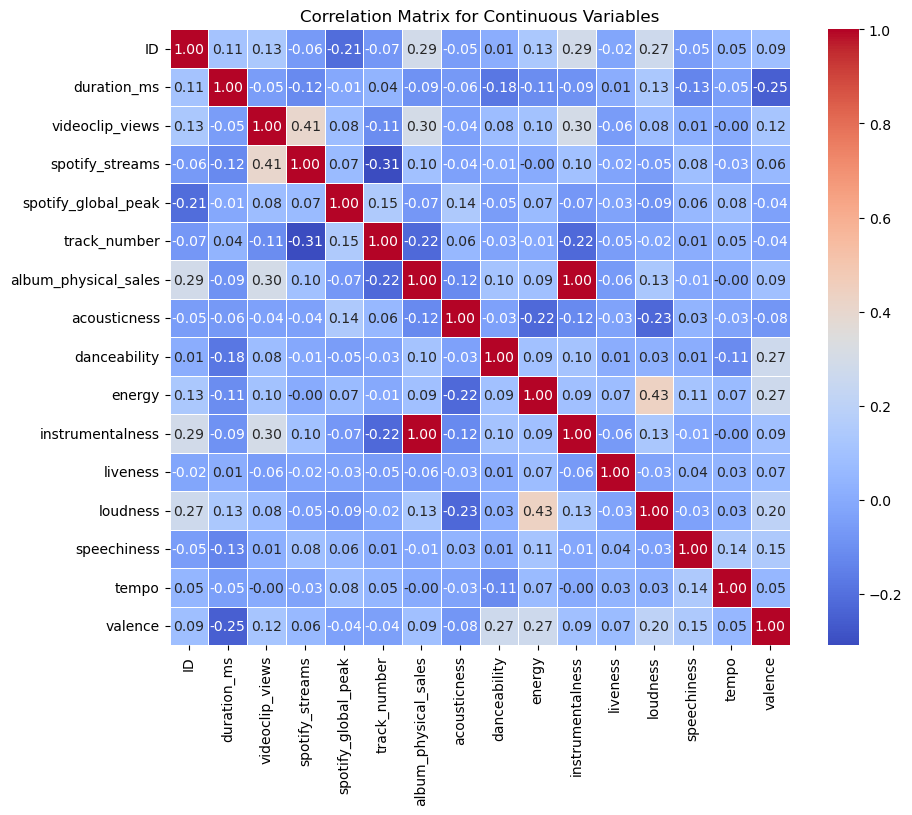

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

# DATA SET GRAPHICAL EXPLORATION 

### A.	Distributions

#### Strong Negative Correlations

In [48]:
data.describe()

,ID,duration_ms,videoclip_views,spotify_streams,spotify_global_peak,track_number,album_physical_sales,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,576.000000,576.000000,5.760000e+02,5.760000e+02,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000
mean,288.439236,239930.809028,4.044509e+07,2.486235e+08,15.414931,11.380208,1.260445e+06,447.833333,541.668403,515.237847,1.260445e+06,330.144097,-7023.230903,364.385417,111484.961806,374.480903
std,166.520232,46020.421199,2.478134e+08,2.941573e+08,25.261548,8.053056,2.136630e+06,295.104385,175.275364,238.577890,2.136630e+06,319.316784,3390.972059,192.311579,44189.221012,216.844427
min,0.000000,83253.000000,0.000000e+00,5.257010e+05,0.000000,1.000000,0.000000e+00,2.000000,7.000000,2.000000,0.000000e+00,1.000000,-17932.000000,3.000000,125.000000,13.000000
25%,144.750000,211843.000000,0.000000e+00,6.626284e+07,0.000000,5.000000,7.500000e+01,173.000000,482.750000,370.500000,7.500000e+01,111.000000,-9198.250000,272.750000,92025.500000,211.000000
50%,288.500000,235340.000000,0.000000e+00,1.511609e+08,5.000000,10.000000,7.550000e+02,418.000000,584.500000,533.500000,7.550000e+02,146.500000,-6983.500000,334.000000,115995.500000,363.000000
75%,432.250000,260440.000000,0.000000e+00,2.983619e+08,21.000000,15.000000,2.352000e+06,723.750000,647.000000,709.750000,2.352000e+06,603.250000,-4916.250000,465.250000,141902.500000,521.750000
max,576.000000,613026.000000,3.423261e+09,1.993770e+09,197.000000,46.000000,8.158000e+06,999.000000,897.000000,949.000000,8.158000e+06,997.000000,-43.000000,931.000000,208918.000000,984.000000


2.5313200760062684

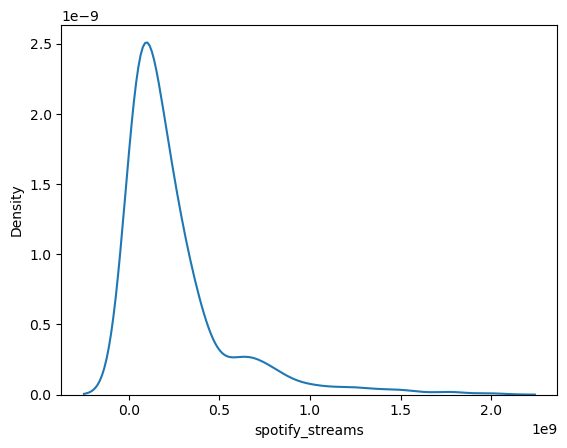

In [50]:
sns.kdeplot(data['spotify_streams'])
data['spotify_streams'].skew()

<Axes: xlabel='spotify_streams'>

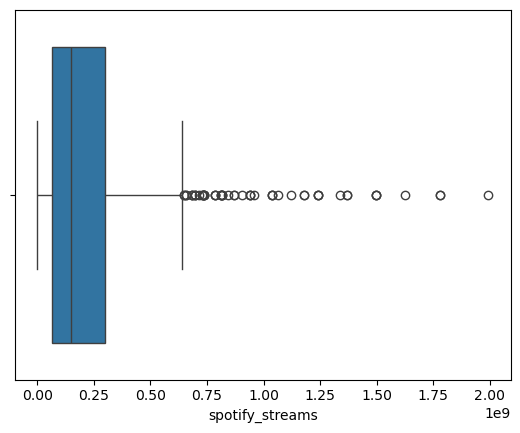

In [52]:
sns.boxplot(x=data['spotify_streams'])

<Axes: xlabel='album_physical_sales', ylabel='Count'>

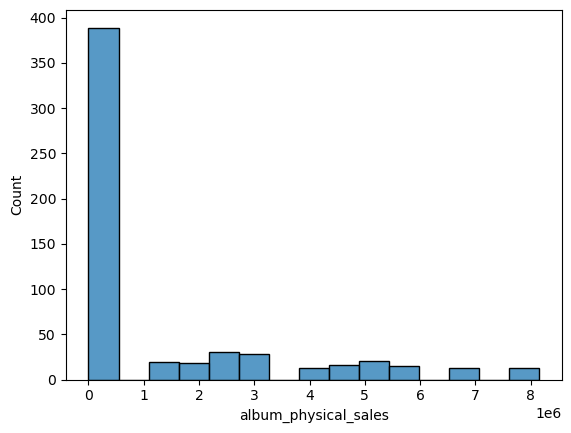

In [54]:
sns.histplot(data['album_physical_sales'])

### B.  Scatter Plots / Pairwise Plots

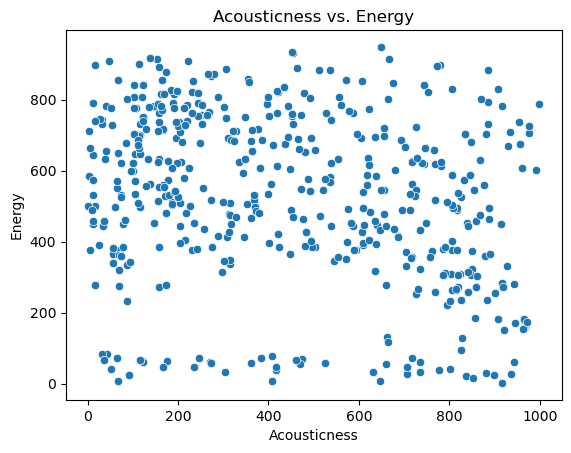

In [56]:
# Scatter Plot: Relationship between 'acousticness' and 'energy'
sns.scatterplot(x=data['acousticness'], y= data['energy'])
plt.title('Acousticness vs. Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

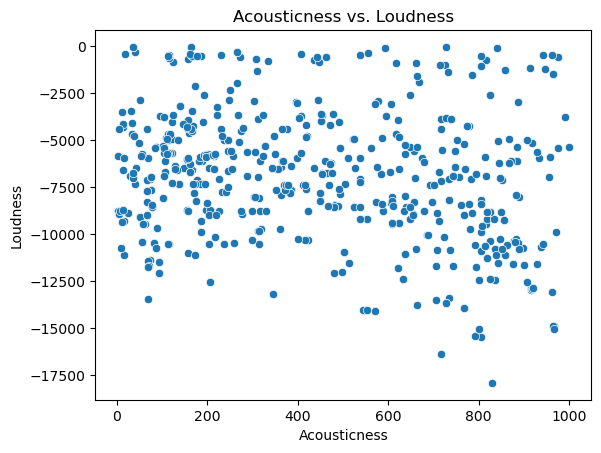

In [58]:
# Scatter Plot: Relationship between 'acousticness' and 'loudness'
sns.scatterplot(x=data['acousticness'], y= data['loudness'])
plt.title('Acousticness vs. Loudness')
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.show()

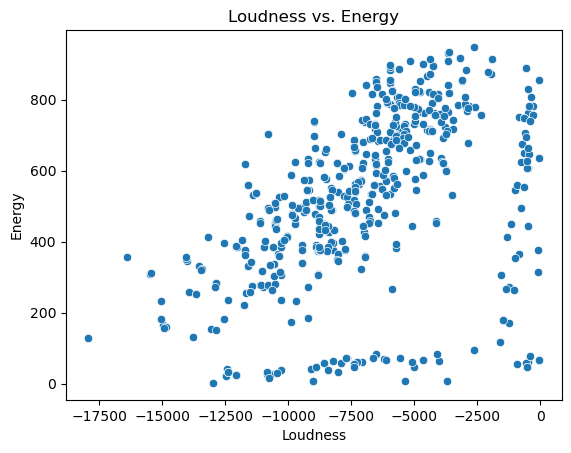

In [60]:
sns.scatterplot(x=data['loudness'], y= data['energy'])
plt.title('Loudness vs. Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

In [ ]:
sns.scatterplot(x=data['energy'], y= data['album_physical_sales'])
plt.title('Energy vs. Album_physical_sales')
plt.xlabel('Energy')
plt.ylabel('album_physical_sales')
plt.show()

### C. Bar Charts (Categorical Variables)

In [ ]:
#Album Genre vs. Physical Sales
grouped_data1=data.groupby('album_musical_genre')['album_physical_sales'].mean()
plt.bar(grouped_data1.index,grouped_data1.values)
plt.title('Musical Genre vs. Album Physical Sales')
plt.xlabel('Musical Genre')
plt.ylabel('Album Physical Sales')

In [ ]:
#Album Genre vs. Total spotify_streams: Compare the performance of different artists in terms of streaming numbers.
grouped_data2=data.groupby('album_musical_genre')['spotify_streams'].mean()
plt.bar(grouped_data2.index,grouped_data2.values)
plt.title('Musical Genre vs. Spotify Streams')
plt.xlabel('Musical Genre')
plt.ylabel('Spotify Streams')

In [ ]:
# Spotify Global Peak vs. Spotify Streams
grouped_data3=data.groupby('spotify_global_peak')['spotify_streams'].mean()
plt.bar(grouped_data3.index,grouped_data3.values)
plt.title('Spotify Global Peak vs. Spotify Streams')
plt.xlabel('Spotify Global Peak')
plt.ylabel('Spotify Streams')

In [ ]:
#Album Genre vs. Average danceability or energy: Group by genres and compute the average danceability or energy for each.
grouped_data4=data.groupby('album_musical_genre')['danceability'].mean()
plt.bar(grouped_data4.index,grouped_data4.values)
plt.title('Musical Genre vs. Average Danceability')
plt.xlabel('Musical Genre')
plt.ylabel('Average Danceability')

In [ ]:
# Track Theme vs Spotfy Global Peak
grouped_data5=data.groupby('track_theme')['spotify_global_peak'].mean()
plt.bar(grouped_data5.index,grouped_data5.values)
plt.title('Track Theme vs Spotfy Global Peak')
plt.xlabel('Track Theme')
plt.ylabel('Spotify Global Peak')
plt.xticks(rotation=45, ha='right')